<a href="https://colab.research.google.com/github/Samuel-Schlemper-Schlemuel/imagesForDataFrameFromInternet/blob/main/imagesForDataFrameFromInternet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from bs4 import BeautifulSoup
from PIL import Image
import requests
from io import BytesIO
import pandas as pd

In [2]:
def getImages(url, max_size = 512, min_size = 50, min_characters = 10, add_text = None):
  df = pd.DataFrame(columns=['prompt', 'image'])
  response = requests.get(url)
  soup = BeautifulSoup(response.content, 'html.parser', from_encoding='utf-8')
  images = soup.find_all('img')

  for img in images:
    try:
      src_url = img.get('src')
      alt_text = img.get('alt')
      response = requests.get(src_url)
      img_data = BytesIO(response.content)
      img_open = Image.open(img_data)
      wid, hei = img_open.size

      if wid > max_size:
        hei = hei / (wid / max_size)
        wid = max_size

      if hei > max_size:
        wid = wid / (hei / max_size)
        hei = max_size
      
      if int(hei) < min_size or int(wid) < min_size or alt_text == None or len(alt_text) < min_characters:
        continue

      img_open = img_open.resize((int(wid), int(hei)))
      if add_text == None:
        df = df.append({'prompt': alt_text, 'image': img_open}, ignore_index=True)
      else:
        df = df.append({'prompt': f'{add_text}, {alt_text}', 'image': img_open}, ignore_index=True)
    except Exception as err:
      print(err)
      continue
  
  df = df.drop_duplicates(subset='prompt', keep='first')
  return df

In [3]:
def many_images(links: list):
  data_frames = []

  for link in links:
    data_frames.append(getImages(link))
  
  concat =  pd.concat(data_frames, ignore_index=True)
  return concat

In [4]:
df = many_images(['https://unsplash.com/pt-br/t/wallpapers', 'https://unsplash.com/pt-br/t/3d-renders'])

cannot identify image file <_io.BytesIO object at 0x7f1d8bcd0090>
cannot identify image file <_io.BytesIO object at 0x7f1d8bcd0310>
cannot identify image file <_io.BytesIO object at 0x7f1d8bc74720>
cannot identify image file <_io.BytesIO object at 0x7f1d8bcd0ae0>
cannot identify image file <_io.BytesIO object at 0x7f1d8b7b92c0>
cannot identify image file <_io.BytesIO object at 0x7f1d8b795ef0>
cannot identify image file <_io.BytesIO object at 0x7f1d8b7b9d10>
cannot identify image file <_io.BytesIO object at 0x7f1d8b7b96d0>


In [5]:
df.head()

,prompt,image
0,uma vista aérea de uma estrada no meio de uma ...,<PIL.Image.Image image mode=RGB size=329x512 a...
1,pessoas andando na ponte de concreto cinza dur...,<PIL.Image.Image image mode=RGB size=512x341 a...
2,vista aérea de montanhas verdes e corpo de águ...,<PIL.Image.Image image mode=RGB size=512x341 a...
3,um edifício alto com um relógio ao lado dele,<PIL.Image.Image image mode=RGB size=384x512 a...
4,um edifício alto com um céu azul no fundo,<PIL.Image.Image image mode=RGB size=419x512 a...


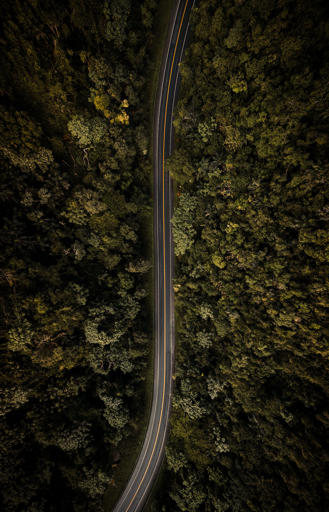

In [6]:
df['image'][0]